# Machine Learning to Predict Students Success at E-Learning Courses

<br>

## Context:

The ***Open University (OU)*** is a public research university and the largest university in the UK for undergraduate education. The majority of the OU's undergraduate students are based in the ***United Kingdom*** and mainly study off-campus, hence many of its courses (both undergraduate and postgraduate) can also be studied online from any part of the world.

***Learning Analytics*** focuses on the collection of learners data to improve their educational experience by providing informed guidance and to optimise learning resources with analytics. To support the research in this area at the Open University, they have developed a dataset, containing data from courses presented at their platform and captured the students interactions with course contents.

## Objective: 

- **Primary:** Predict wether the student pass or fail the course.
- **Secondary:** Observe the importance of student interations on their success.

## Data Set: 

The Open University Learning Analytics dataset (OULAD) contains a subset of the OU student data from 2013 and 2014 and is available at: https://www.nature.com/articles/sdata2017171. The dataset contains the information about ***22 courses***, ***32593 students***, their assessment results, and logs of their interactions with the Virtual Learning Environment (VLE) represented by daily summaries of ***student clicks (10,655,280 entries)***.

In general, there are three different data types:

- **Demographic:** Represents the basic information about the students including their age, gender, region, highest education, deprivation index and disability.
- **Performance:** Reflects students results and achievements during their studies for the courses they have enrolled.
- **Learning behaviour:** Students interactions with the Virtual Learning Environment (clickstream).

## Data Structure:

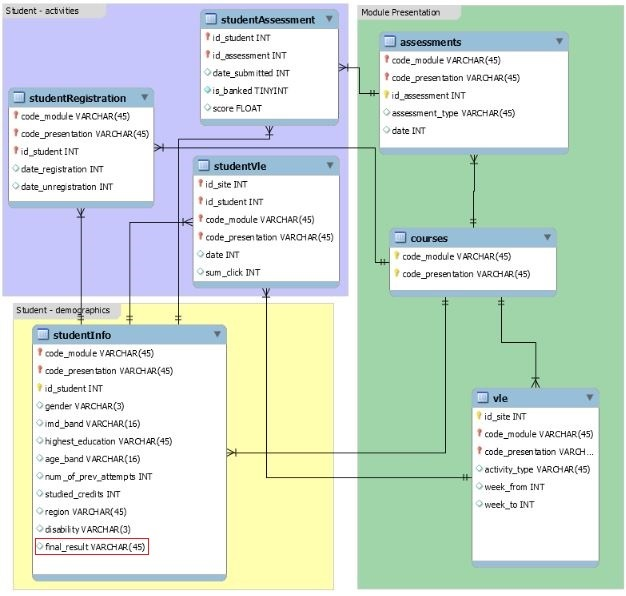


## Working Strategy:

This approach will be based on students scores throughout the course and interactions with study materials.
1. Obtain the scores for each student per module / presentation / assessment type.
       'CMA', 'TMA', 'Exam'
2. Obtain the students interactions with each resource available per module / presentation / activity type.
       'resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'
3. Filter features based on their distributions.
4. Merge the resulting tables from 1 and 2 into general student information.
5. Evaluate features relevancy.
6. Classifiers to consider:
 - Logistic Regression
 - Decision Tree
 - Nearest Neighbors
 - Gradient Descent
 - Support Vector Machine

### ETL Diagram

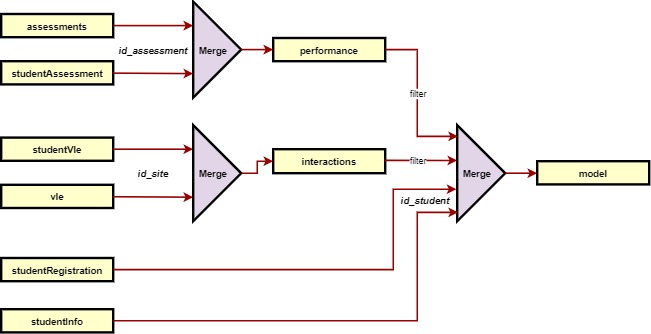

### Tables Feeding the Model

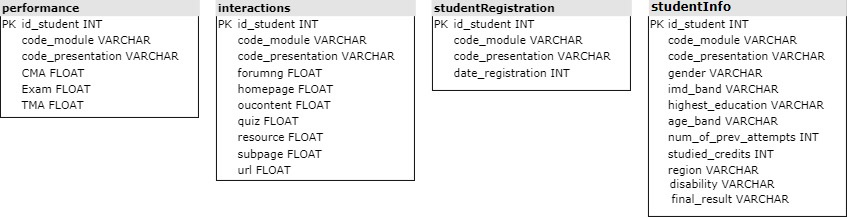

## A. Data Exploration, Cleaning and Transformation

In [1]:
# Importing useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [2]:
# Loading data as dataframes

df_assessments = pd.read_csv("assessments.csv")
df_stdnt_assessment = pd.read_csv("studentAssessment.csv")
df_stdnt_vle = pd.read_csv("studentVle.csv")
df_vle = pd.read_csv("vle.csv")
df_stdnt_info = pd.read_csv("studentInfo.csv")
df_stdnt_registration = pd.read_csv("studentRegistration.csv")

### 1. Create a table with assessment types and scores per module / presentation / student

In [3]:
df_performance = pd.merge(df_stdnt_assessment, df_assessments, on="id_assessment", how="right")
df_performance = df_performance.pivot_table(index=["id_student", "code_module", "code_presentation"], columns="assessment_type", values="score", aggfunc="mean", fill_value=0)
df_performance.reset_index(inplace=True)

In [4]:
df_performance

assessment_type,id_student,code_module,code_presentation,CMA,Exam,TMA
0,"6,516.00",AAA,2014J,0.00,0,61.80
1,"8,462.00",DDD,2013J,0.00,0,87.67
2,"8,462.00",DDD,2014J,0.00,0,86.50
3,"11,391.00",AAA,2013J,0.00,0,82.00
4,"23,629.00",BBB,2013B,100.00,0,65.00
...,...,...,...,...,...,...
25815,"2,698,257.00",AAA,2013J,0.00,0,67.80
25816,"2,698,535.00",CCC,2014B,24.67,0,23.00
25817,"2,698,535.00",EEE,2013J,0.00,0,54.25
25818,"2,698,577.00",BBB,2014J,0.00,0,64.40


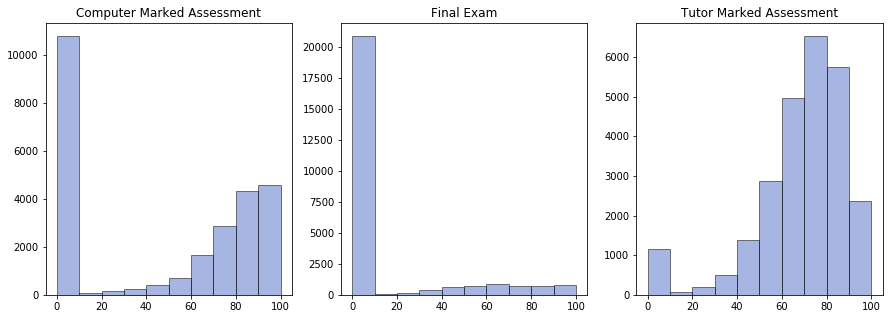

In [5]:
# Assessment Types Histograms

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15,5])
ax1.hist(df_performance['CMA'], alpha=0.5, ec="black", color="#506DC7")
ax1.set_title('Computer Marked Assessment')
ax2.hist(df_performance['Exam'], alpha=0.5, ec="black", color="#506DC7")
ax2.set_title('Final Exam')
ax3.hist(df_performance['TMA'], alpha=0.5, ec="black", color="#506DC7")
ax3.set_title('Tutor Marked Assessment')
plt.show()

### 2. Identify the students clicks for each resource available per course activity_type / id_site

In [6]:
# List student interactions (total clicks) by student / study_material

df_stdnt_vle = df_stdnt_vle.groupby(["id_student", "id_site"]).agg({"sum_click": sum}).reset_index()

df_interactions = pd.merge(df_stdnt_vle, df_vle, on="id_site", how="left")
df_interactions = df_interactions.pivot_table(index=["id_student", "code_module", "code_presentation"], columns="activity_type", values="sum_click", aggfunc="sum", fill_value=0)
df_interactions.reset_index(inplace=True)

In [7]:
df_interactions

activity_type,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,21,0,0,0,451,0,497,0,0,1505,0,0,0,0,0,0,31,0,143,143
1,8462,DDD,2013J,0,0,12,0,36,0,184,0,12,64,0,18,0,0,0,0,70,0,227,23
2,8462,DDD,2014J,0,0,0,0,2,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0
3,11391,AAA,2013J,0,0,0,0,193,0,138,0,0,553,0,0,0,0,0,0,13,0,32,5
4,23629,BBB,2013B,0,0,0,0,87,0,36,0,0,0,0,0,0,0,31,0,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013J,0,0,0,0,201,0,165,0,0,331,0,0,0,0,0,0,12,0,44,5
29224,2698535,CCC,2014B,0,0,0,0,309,0,98,0,0,6,0,0,0,0,292,0,23,0,52,6
29225,2698535,EEE,2013J,0,2,0,0,1953,0,391,0,0,773,0,119,0,0,111,0,3,0,13,90
29226,2698577,BBB,2014J,0,0,0,0,103,0,204,0,5,253,0,0,0,0,72,0,38,0,38,4


In [8]:
df_interactions.loc[:,"dataplus":].describe()

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
count,"29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00","29,228.00"
mean,1.62,0.71,2.20,0.19,272.80,3.01,237.75,0.32,3.73,383.43,1.34,30.60,2.18,2.22,238.85,0.00,37.98,0.01,116.72,19.39
std,7.07,2.78,8.48,0.82,597.67,35.57,320.22,1.45,10.95,657.48,7.78,88.39,5.67,7.10,466.34,0.03,72.72,0.10,163.77,36.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,17.00,0.00,55.00,0.00,0.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,17.00,1.00
50%,0.00,0.00,0.00,0.00,93.00,0.00,144.00,0.00,0.00,106.00,0.00,0.00,0.00,0.00,75.00,0.00,23.00,0.00,52.00,8.00
75%,0.00,0.00,0.00,0.00,288.00,0.00,304.00,0.00,2.00,445.00,0.00,17.00,1.00,0.00,215.00,0.00,48.00,0.00,155.00,25.00
max,143.00,68.00,340.00,13.00,"13,154.00","2,952.00","7,277.00",33.00,316.00,"9,308.00",317.00,"2,117.00",334.00,89.00,"13,032.00",4.00,"5,147.00",6.00,"4,345.00","2,134.00"


In [9]:
# Filtering resources which have dispersed number of values

for col in df_interactions.columns:
    if df_interactions[col].dtype == "int64":
        if df_interactions[col].median() == 0:
            df_interactions.drop(labels=col, axis="columns", inplace=True)

In [10]:
df_interactions.loc[:,"forumng":"url"]

activity_type,forumng,homepage,oucontent,quiz,resource,subpage,url
0,451,497,1505,0,31,143,143
1,36,184,64,0,70,227,23
2,2,7,0,0,0,0,0
3,193,138,553,0,13,32,5
4,87,36,0,31,2,5,0
...,...,...,...,...,...,...,...
29223,201,165,331,0,12,44,5
29224,309,98,6,292,23,52,6
29225,1953,391,773,111,3,13,90
29226,103,204,253,72,38,38,4


### 3. Joining performance and interactions with student general information

In [11]:
# Merging studentInfo with interactions, scores and registration

df_model = pd.merge(df_stdnt_info, df_performance.drop(labels="Exam", axis="columns"), on=["code_module", "code_presentation", "id_student"], how="left")
df_model = pd.merge(df_model, df_interactions, on=["code_module", "code_presentation", "id_student"], how="left")
df_model = pd.merge(df_model, df_stdnt_registration.drop(labels="date_unregistration", axis="columns"), on=["code_module", "code_presentation", "id_student"], how="left")

In [12]:
df_model

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,CMA,TMA,forumng,homepage,oucontent,quiz,resource,subpage,url,date_registration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0.00,82.00,193.00,138.00,553.00,0.00,13.00,32.00,5.00,-159.00
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0.00,66.40,417.00,324.00,537.00,0.00,12.00,87.00,48.00,-53.00
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,nan,nan,126.00,59.00,66.00,0.00,4.00,22.00,4.00,-92.00
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0.00,76.00,634.00,432.00,836.00,0.00,19.00,144.00,90.00,-52.00
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0.00,54.40,194.00,204.00,494.00,0.00,45.00,79.00,14.00,-176.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,nan,nan,0.00,22.00,6.00,0.00,4.00,9.00,0.00,-4.00
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,93.33,77.67,65.00,167.00,348.00,152.00,109.00,47.00,0.00,-23.00
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,80.00,70.00,0.00,63.00,79.00,130.00,19.00,20.00,0.00,-129.00
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,100.00,83.00,118.00,65.00,40.00,31.00,9.00,12.00,0.00,-49.00


## B. Exploring the Model

### Features

- **Gender (Category)**: Students sex.
- **Region (Category)**: Part of England where the student is located.
- **Highest Education (Category)**: Student highest level of education achieved.
- **Multiple Deprivation Index Band (Category)**: Indicator of the lacks of primary resources in England per zone.
- **Age Band (Category)**: Student age range.
- **Number of Previous Attempts (Numeric)**: Previous attempst to complete de course.
- **Studied Credits (Numeric)**: Total number of credits enrolled by the student.
- **Disability (Category)**: Student with disabiliy.
- **CMA Score (Numeric)**: 
- **TMA Score (Numeric)**: Average of the Tutor Marked Assignment scores per student / module / presentation.
- **Number of Clicks per Study Resource (Numerics)**: Sum of clicks per student / material (forumng, homepage, oucontent, quiz, resource, subpage, url).
- **Registration Date (Numeric)**: Date wheter the student registered or unregistered into the course.

### Target Label

- **Final Result (Category)**: (Pass, Distinction) | (Fail, Withdrawn).

### 1. Data Cleaning

In [13]:
# Unique values for each of the non-numeric features:

for col in df_model.loc[:, "gender":].columns:
    if df_model[col].dtype == 'object':
        print(f"{col} has {len(df_model[col].unique())} unique values:")
        display(pd.DataFrame(df_model[col].value_counts(dropna=False)))

gender has 2 unique values:


,gender
M,17875
F,14718


region has 13 unique values:


,region
Scotland,3446
East Anglian Region,3340
London Region,3216
South Region,3092
North Western Region,2906
West Midlands Region,2582
South West Region,2436
East Midlands Region,2365
South East Region,2111
Wales,2086


highest_education has 5 unique values:


,highest_education
A Level or Equivalent,14045
Lower Than A Level,13158
HE Qualification,4730
No Formal quals,347
Post Graduate Qualification,313


imd_band has 11 unique values:


,imd_band
20-30%,3654
30-40%,3539
10-20,3516
0-10%,3311
40-50%,3256
50-60%,3124
60-70%,2905
70-80%,2879
80-90%,2762
90-100%,2536


age_band has 3 unique values:


,age_band
0-35,22944
35-55,9433
55<=,216


disability has 2 unique values:


,disability
N,29429
Y,3164


final_result has 4 unique values:


,final_result
Pass,12361
Withdrawn,10156
Fail,7052
Distinction,3024


In [14]:
# Replace NaN values in imd_band with the mode 20-30%

df_model["imd_band"] = df_model["imd_band"].str.replace(r'%', '')
df_model["imd_band"].fillna("20-30", inplace=True)
df_model.fillna(value=0, inplace=True)
df_model["date_registration"] = df_model["date_registration"].abs()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              32593 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  final_result          32593 non-null  object 
 12  CMA                   32593 non-null  float64
 13  TMA                   32593 non-null  float64
 14  forumng               32593 non-null  float64
 15  homepage           

### 2. Feature Encoding (Label Encoding)

In [15]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

def feature_encoder(df, features):
    label_encoder = preprocessing.LabelEncoder()
    for col in features:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [16]:
category_features = ["gender", "region", "highest_education", "imd_band", "age_band", "disability"]
numerical_features = ["CMA", "TMA", "forumng", "homepage", "oucontent",
                      "quiz", "resource", "subpage", "url"]
target_label = "final_result"

encoded_features = feature_encoder(df_model, category_features)

results_classifier = lambda x: 1 if x == 'Pass' or x == 'Distinction' else 0
encoded_features["final_result"] = encoded_features["final_result"].apply(results_classifier)

encoded_features

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,CMA,TMA,forumng,homepage,oucontent,quiz,resource,subpage,url,date_registration
0,AAA,2013J,11391,1,0,1,9,2,0,240,0,1,0.00,82.00,193.00,138.00,553.00,0.00,13.00,32.00,5.00,159.00
1,AAA,2013J,28400,0,6,1,2,1,0,60,0,1,0.00,66.40,417.00,324.00,537.00,0.00,12.00,87.00,48.00,53.00
2,AAA,2013J,30268,0,5,0,3,1,0,60,1,0,0.00,0.00,126.00,59.00,66.00,0.00,4.00,22.00,4.00,92.00
3,AAA,2013J,31604,0,7,0,5,1,0,60,0,1,0.00,76.00,634.00,432.00,836.00,0.00,19.00,144.00,90.00,52.00
4,AAA,2013J,32885,0,11,2,5,0,0,60,0,1,0.00,54.40,194.00,204.00,494.00,0.00,45.00,79.00,14.00,176.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,0,10,2,1,0,0,30,0,0,0.00,0.00,0.00,22.00,6.00,0.00,4.00,9.00,0.00,4.00
32589,GGG,2014J,2645731,0,0,2,4,1,0,30,0,1,93.33,77.67,65.00,167.00,348.00,152.00,109.00,47.00,0.00,23.00
32590,GGG,2014J,2648187,0,8,0,2,0,0,30,1,1,80.00,70.00,0.00,63.00,79.00,130.00,19.00,20.00,0.00,129.00
32591,GGG,2014J,2679821,0,7,2,9,1,0,30,0,0,100.00,83.00,118.00,65.00,40.00,31.00,9.00,12.00,0.00,49.00


### 3. Features Importance

,Feature,Score
0,TMA,0.28
1,homepage,0.26
2,resource,0.19
3,forumng,0.17
4,subpage,0.17
5,oucontent,0.15
6,CMA,0.14
7,quiz,0.14
8,url,0.12
9,highest_education,0.02


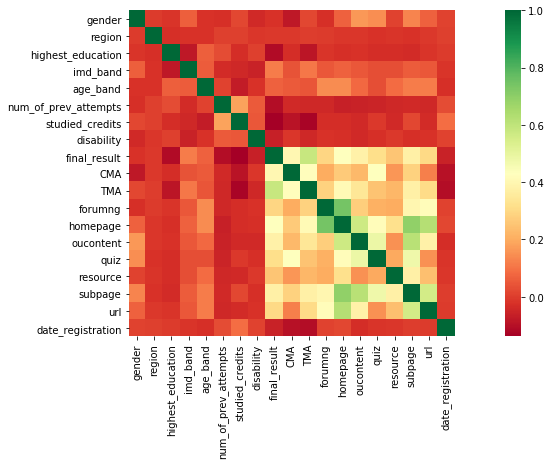

In [17]:
to_drop = ["code_module", "code_presentation", "id_student"]

X = encoded_features.loc[:,"gender":].drop("final_result", axis="columns")
y = encoded_features["final_result"]

best_features = SelectKBest(score_func=mutual_info_classif, k=18)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
feature_scores = pd.concat([df_columns, df_scores], axis="columns")
feature_scores.columns = ['Feature','Score']

# Comparing methods: SelectKBest and Heatmap Correlation Matrix
display(feature_scores.nlargest(18,'Score').reset_index(drop=True))
plt.figure(figsize=[18, 6])
sns.heatmap(encoded_features.loc[:,"gender":].corr(), square=True, cmap='RdYlGn')

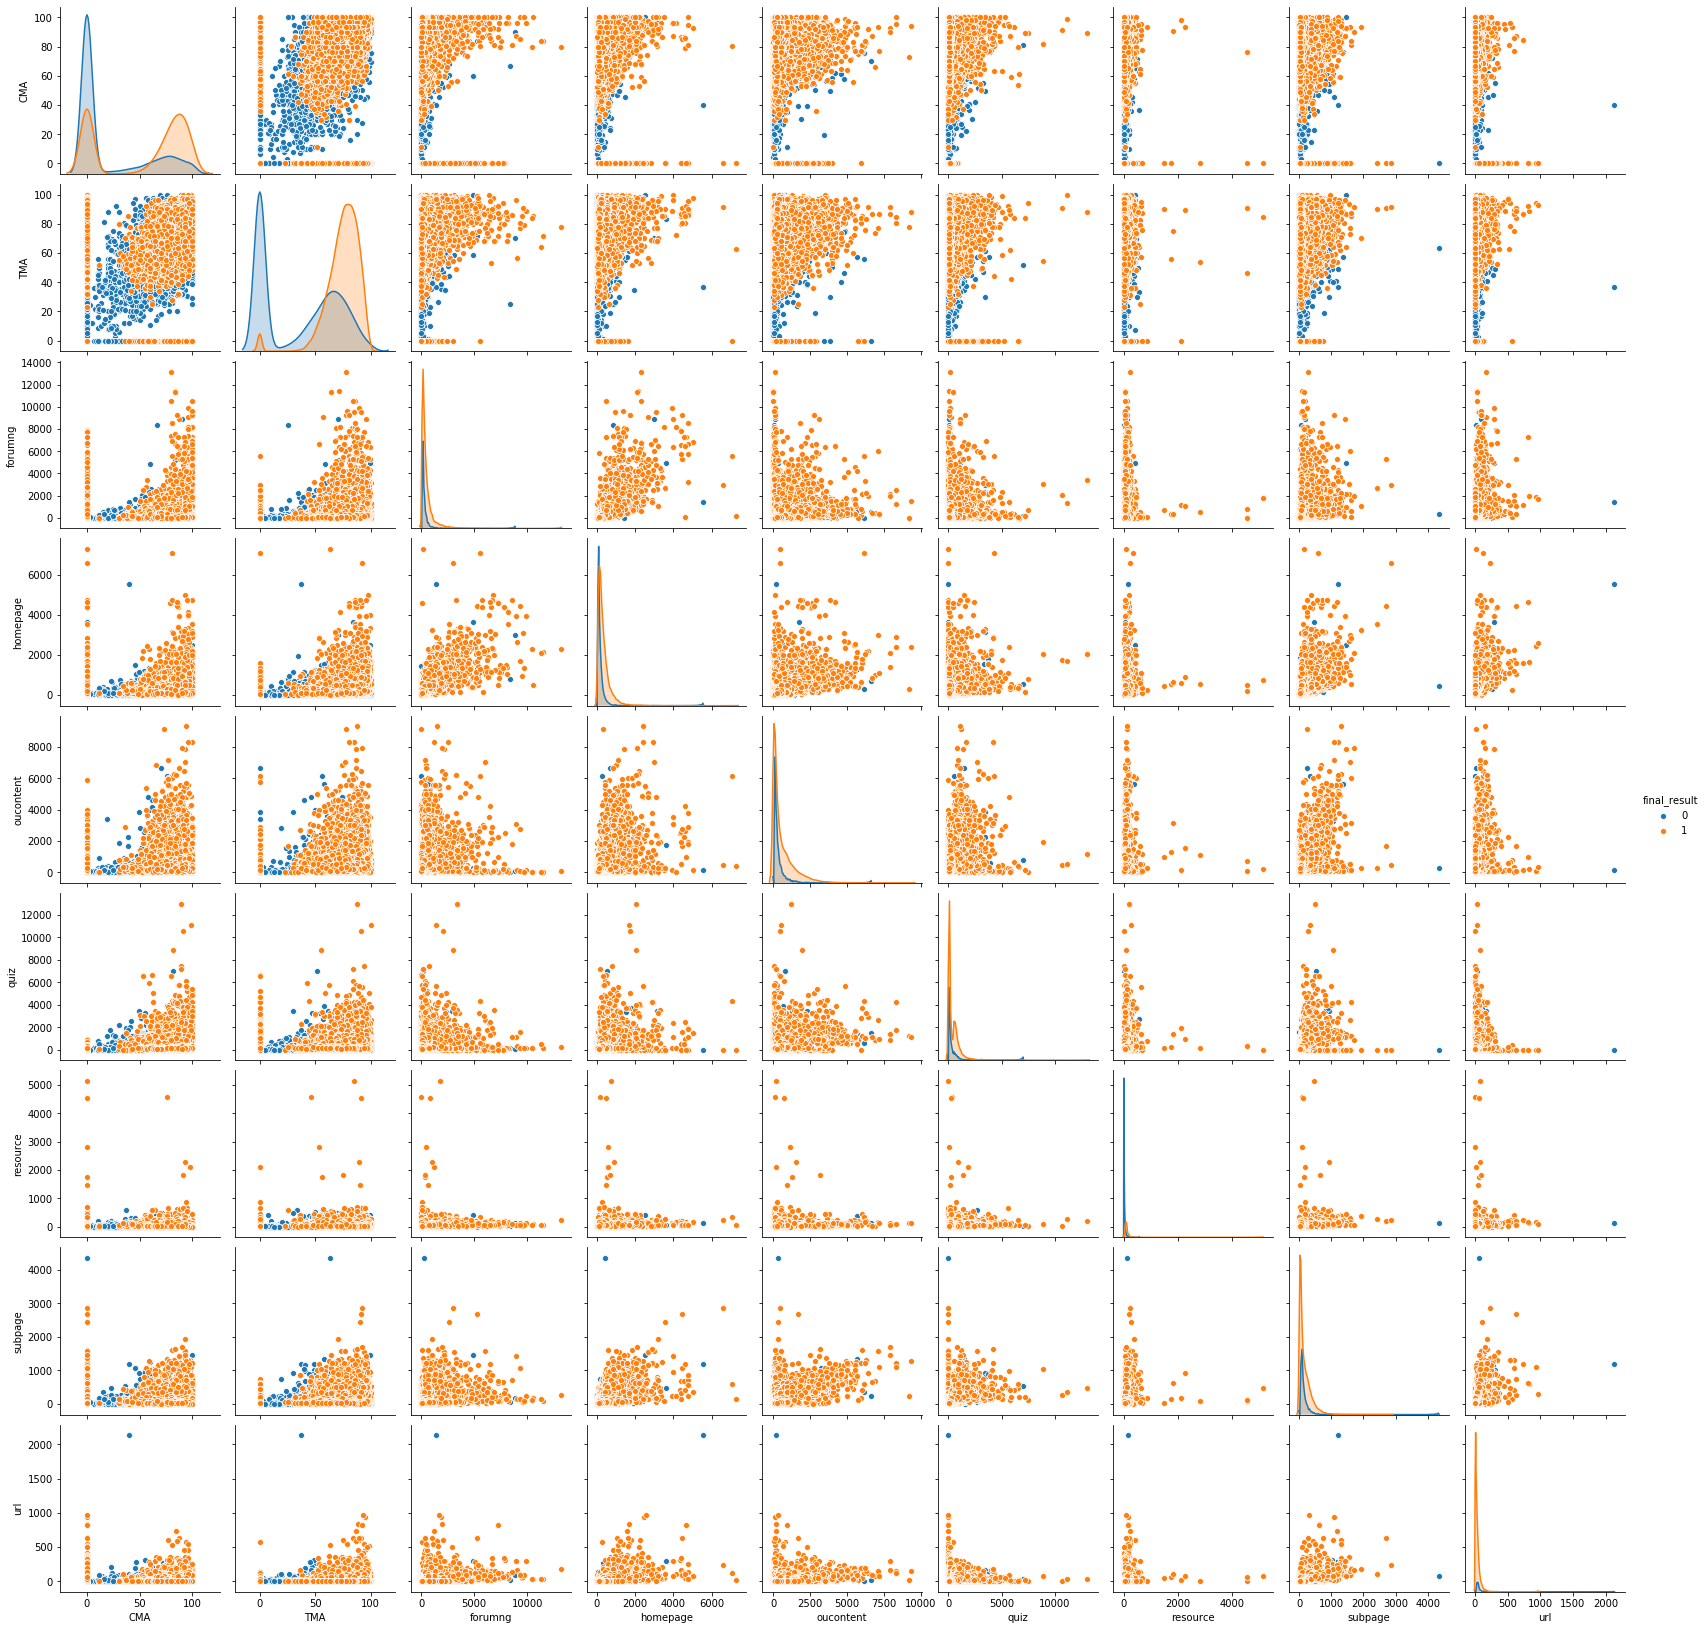

In [18]:
ax = sns.pairplot(encoded_features, hue="final_result", vars=numerical_features)

## C. Training Different Models

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, accuracy_score

# Metrics summary for further evaluation
df_metrics = pd.DataFrame(
    index=["Accuracy", "Precision", "Recall"],
    columns=["Logistic Regression", "Decision Tree", "Nearest Neighbors", "Gradient Descent", "Support Vector Machine"]
)

def to_metrics(classifier, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    df_metrics.loc["Accuracy", classifier] = accuracy
    df_metrics.loc["Precision", classifier] = precision
    df_metrics.loc["Recall", classifier] = recall
    
    print("Accuracy score = %0.2f" %accuracy)
    
def calibrated_clf(classifier, calibrator, params, X, y):
    clf = classifier()
    cal_clf = calibrator(clf, params, cv=3)
    cal_clf.fit(X, y)
    print(f"Best parameters: {cal_clf.best_params_}")
    return cal_clf

# Defining features and target:
X = X.values
y = y.values

# Extracting data for training and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_train)

### 1. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Tunning Learning Parameters
lg_parameters = {"C": [0.01, 0.1],
                 "max_iter": [5000]}
calibrated_logreg = calibrated_clf(LogisticRegression, GridSearchCV, lg_parameters, X, y)
y_pred = calibrated_logreg.predict(X_test)

# Metrics
to_metrics("Logistic Regression", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_lg = confusion_matrix(y_test, y_pred)
df_cm_lg = pd.DataFrame(cm_lg, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_lg

Best parameters: {'C': 0.01, 'max_iter': 5000}
Accuracy score = 0.82


,Pred Fail,Pred Pass
Actual Fail,4188,974
Actual Pass,788,3828


### 2. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

# Metrics
to_metrics("Decision Tree", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_dt = confusion_matrix(y_test, y_pred)
df_cm_dt = pd.DataFrame(cm_dt, index=["True Fail", "True Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_dt

Accuracy score = 0.81


,Pred Fail,Pred Pass
True Fail,4191,971
True Pass,926,3690


### 3. Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Tunning Learning Parameters
knn_parameters = {"n_neighbors": [n for n in range(4, 11)],
                  "leaf_size": [n for n in range(20, 31)]}
calibrated_knn = calibrated_clf(KNeighborsClassifier, GridSearchCV, knn_parameters, X, y)
y_pred = calibrated_knn.predict(X_test)

# Metrics
to_metrics("Nearest Neighbors", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_nn = confusion_matrix(y_test, y_pred)
df_cm_nn = pd.DataFrame(cm_nn, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_nn

Best parameters: {'leaf_size': 20, 'n_neighbors': 9}
Accuracy score = 0.86


,Pred Fail,Pred Pass
Actual Fail,4233,929
Actual Pass,404,4212


### 4. Gradient Descent

In [23]:
from sklearn.linear_model import SGDClassifier

# Tunning Learning Parameters
gdc_parameters = {'alpha':[0.1, 0.3, 0.5],
                  'epsilon':[0.05, 0.1, 0.5]}
calibrated_gdc = calibrated_clf(SGDClassifier, GridSearchCV, gdc_parameters, X, y)
y_pred = calibrated_gdc.predict(X_test)

# Metrics
to_metrics("Gradient Descent", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_gd = confusion_matrix(y_test, y_pred)
df_cm_gd = pd.DataFrame(cm_gd, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_gd

Best parameters: {'alpha': 0.1, 'epsilon': 0.1}
Accuracy score = 0.81


,Pred Fail,Pred Pass
Actual Fail,4226,936
Actual Pass,961,3655


### 5. Support Vector Machine

In [24]:
from sklearn.svm import SVC

# Tunning Learning Parameters
svc_parameters = {'C':[0.1, 1],}
calibrated_svc = calibrated_clf(SVC, GridSearchCV, svc_parameters, X, y)
y_pred = calibrated_svc.predict(X_test)

# Metrics
to_metrics("Support Vector Machine", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_sv = confusion_matrix(y_test, y_pred)
df_cm_sv = pd.DataFrame(cm_sv, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_sv

Best parameters: {'C': 0.1}
Accuracy score = 0.81


,Pred Fail,Pred Pass
Actual Fail,4033,1129
Actual Pass,752,3864


## D. Models Performance

Performance measurements:
- **Accuracy**: Number of **true predictions** over the **total of predictions**.
- **Precision**: Number of **predicted true pass** over the total **pass predictions**.
- **Recall**: Number of **predicted true pass** over the total of **true pass**.

In [25]:
df_metrics

,Logistic Regression,Decision Tree,Nearest Neighbors,Gradient Descent,Support Vector Machine
Accuracy,0.82,0.81,0.86,0.81,0.81
Precision,0.80,0.79,0.82,0.80,0.77
Recall,0.83,0.80,0.91,0.79,0.84


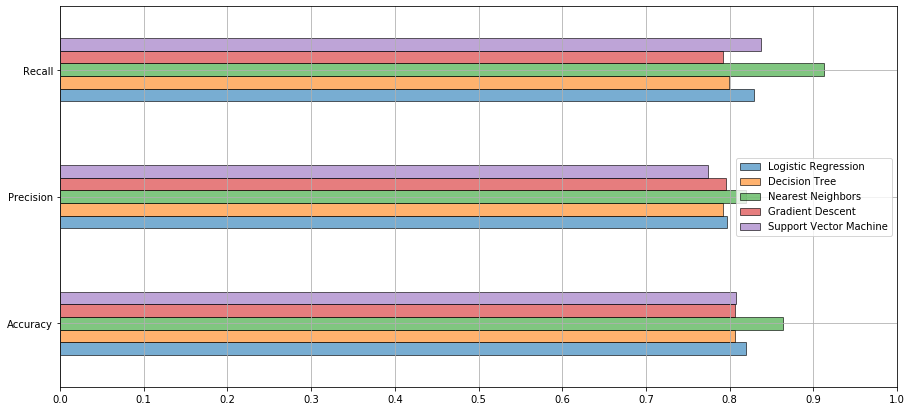

In [26]:
x_ticks = np.linspace(0, 1, 11)
fig, ax = plt.subplots(figsize=[15, 7])
df_metrics.plot(kind="barh", ax=ax, ec="black", alpha=0.6)
ax.set_xticks(x_ticks)
ax.legend()
ax.grid()

## Nearest Neighbor performance evaluation

The probability of getting a TP over a FP as per AUC is: 0.95


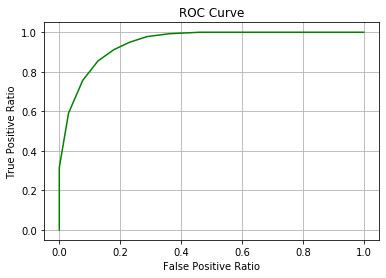

In [28]:
# print(knn_clf.predict_proba(X_test))

y_pred_prob = calibrated_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='green')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC Curve")
plt.grid()

print("The probability of getting a TP over a FP as per AUC is: %0.2f" % (roc_auc_score(y_test, y_pred_prob)))

## E. Conclusion

- Use of study contents are directly correlated with students success in their courses.
- Models were evaluated first with no hyperparameter tunning, where was found with better performance: LR, DT, NN.
- Models which perfomance improved after hyperparameter tunning: GDC, SVM.
- Motivational thoughts.